In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
names =[
    'artist', 'cmc', 'color_identity', 'toughness', 'creature', 'power', 'standard'
]

In [3]:
df= pd.read_csv('scryfall-default-cards-cleaned-more.csv', 
                 header = 0, delimiter = ",", na_values = '?', low_memory=False)
print(df.shape)

(44993, 7)


In [4]:
df = df[:4500][:]
creatures = pd.DataFrame(columns=names)

In [5]:
for index, row in df.iterrows():
   if(row['creature'] == 1):
    creatures = creatures.append(row)

In [6]:
print(creatures.shape)
print(creatures[:5][:])

(2260, 7)
            artist  cmc color_identity toughness creature power standard
0    Kieran Yanner  2.0          ['B']         1        1     1        0
11   Igor Kieryluk  8.0             []         8        1     8        0
14      Kev Walker  3.0     ['G', 'W']         2        1     3        0
15  Lucas Graciano  3.0     ['B', 'R']         2        1     2        0
16      Chris Rahn  5.0     ['G', 'W']         5        1     5        0


In [7]:
creatures_cost = creatures['cmc']
creatures2 = creatures['power']
creatures2 = pd.to_numeric(creatures2)

In [8]:
print(creatures_cost.shape)
print(creatures2.shape)
print(creatures_cost[:5][:])
print(creatures2[:5][:])

(2260,)
(2260,)
0     2.0
11    8.0
14    3.0
15    3.0
16    5.0
Name: cmc, dtype: float64
0     1.0
11    8.0
14    3.0
15    2.0
16    5.0
Name: power, dtype: float64


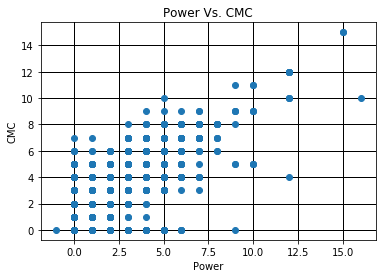

In [9]:
plt.plot(creatures2, creatures_cost, 'o')
plt.ylabel('CMC')
plt.xlabel('Power')
plt.title('Power Vs. CMC')
plt.grid(color='black', linestyle='-', linewidth=1)

In [10]:
def fit_linear(x,y):
    xm = np.mean(x)
    ym = np.mean(y)
    syy = np.mean((y-ym)**2)
    sxx = np.mean((x-xm)**2)
    sxy = np.mean((y-ym)*(x-xm))
    w1 = sxy/sxx
    w0 = ym - w1*xm
    yhat = w0 + w1 * x
    rss = np.mean((y-yhat)**2)
    tss = syy
    rsq = 1 - rss/tss
    return w0, w1, rsq

In [11]:
w0, w1, rsq = fit_linear(creatures2, creatures_cost)
print("w0 =",w0,"| w1 =", w1, "| rsq =", rsq)

w0 = 1.3520605613298877 | w1 = 0.7757849584140899 | rsq = 0.5208950093224785


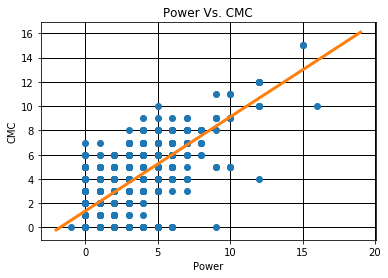

In [16]:
xp = np.arange(-2, 20)
yp = w0 + w1 * xp
plt.plot(creatures2, creatures_cost, 'o')
plt.ylabel('CMC')
plt.xlabel('Power')
plt.title('Power Vs. CMC')
plt.grid(color='black', linestyle='-', linewidth=1)
plt.plot(xp, yp, linewidth=3)